In [1]:
# Standard library imports
import os
import json
from warnings import simplefilter

# Third-party imports
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
from scipy.optimize import minimize
from scipy.stats import bernoulli, gaussian_kde
from scipy.special import expit as sigmoid
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    KFold,
    cross_val_score,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic
from sklearn.metrics import pairwise_distances, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize

# Ignore future warnings for cleaner output
simplefilter(action="ignore", category=FutureWarning)

# Matplotlib settings
plt.rcParams["text.usetex"] = True
plt.rcParams.update({"font.family": "serif", "font.serif": ["Times New Roman"]})

# Load Immu Dataset

In [2]:
import json


# Function to load JSON file
def load_json(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)
    return data


Immu_Graph_Name_ID_class = load_json("../../Dataset/Immu_Graph_Name_ID_class.json")

# Split into Train and Test Dataset

In [3]:
Immu_Graph_Name_ID = list(Immu_Graph_Name_ID_class.keys())
Immu_Graph_Class_Text = list(Immu_Graph_Name_ID_class.values())

In [4]:
Immu_Graph_Class = []
for i in range(0, len(Immu_Graph_Class_Text)):
    if Immu_Graph_Class_Text[i] == "No":
        Immu_Graph_Class.append(0)
    elif Immu_Graph_Class_Text[i] == "Yes":
        Immu_Graph_Class.append(1)
    else:
        print("error")

In [5]:
matrix_no_index_list = []
matrix_yes_index_list = []

for i in range(0, len(Immu_Graph_Name_ID)):
    if Immu_Graph_Name_ID_class[Immu_Graph_Name_ID[i]] == "No":
        matrix_no_index_list.append(i)

    elif Immu_Graph_Name_ID_class[Immu_Graph_Name_ID[i]] == "Yes":
        matrix_yes_index_list.append(i)
    else:
        print("error")

In [6]:
matrix_no_index_list_train, matrix_no_index_list_test = train_test_split(
    matrix_no_index_list, random_state=42, test_size=0.2
)

matrix_yes_index_list_train, matrix_yes_index_list_test = train_test_split(
    matrix_yes_index_list, random_state=42, test_size=0.2
)

In [7]:
train_index = list(matrix_no_index_list_train) + list(matrix_yes_index_list_train)

test_index = list(matrix_no_index_list_test) + list(matrix_yes_index_list_test)

In [8]:
Immu_Graph_Class_train = [Immu_Graph_Class[i] for i in train_index]
Immu_Graph_Class_test = [Immu_Graph_Class[i] for i in test_index]

# Load Postprocessed Distance Matrix Data from Graph Kernel
## These Distance Matrix Data as the same index order as the Immu Data

In [9]:
with open("graphkernel_immu_graphs.pkl", "rb") as f:
    graphkernel_immu_graphs = pickle.load(f)

## Display similarity or dissimilarity matrix

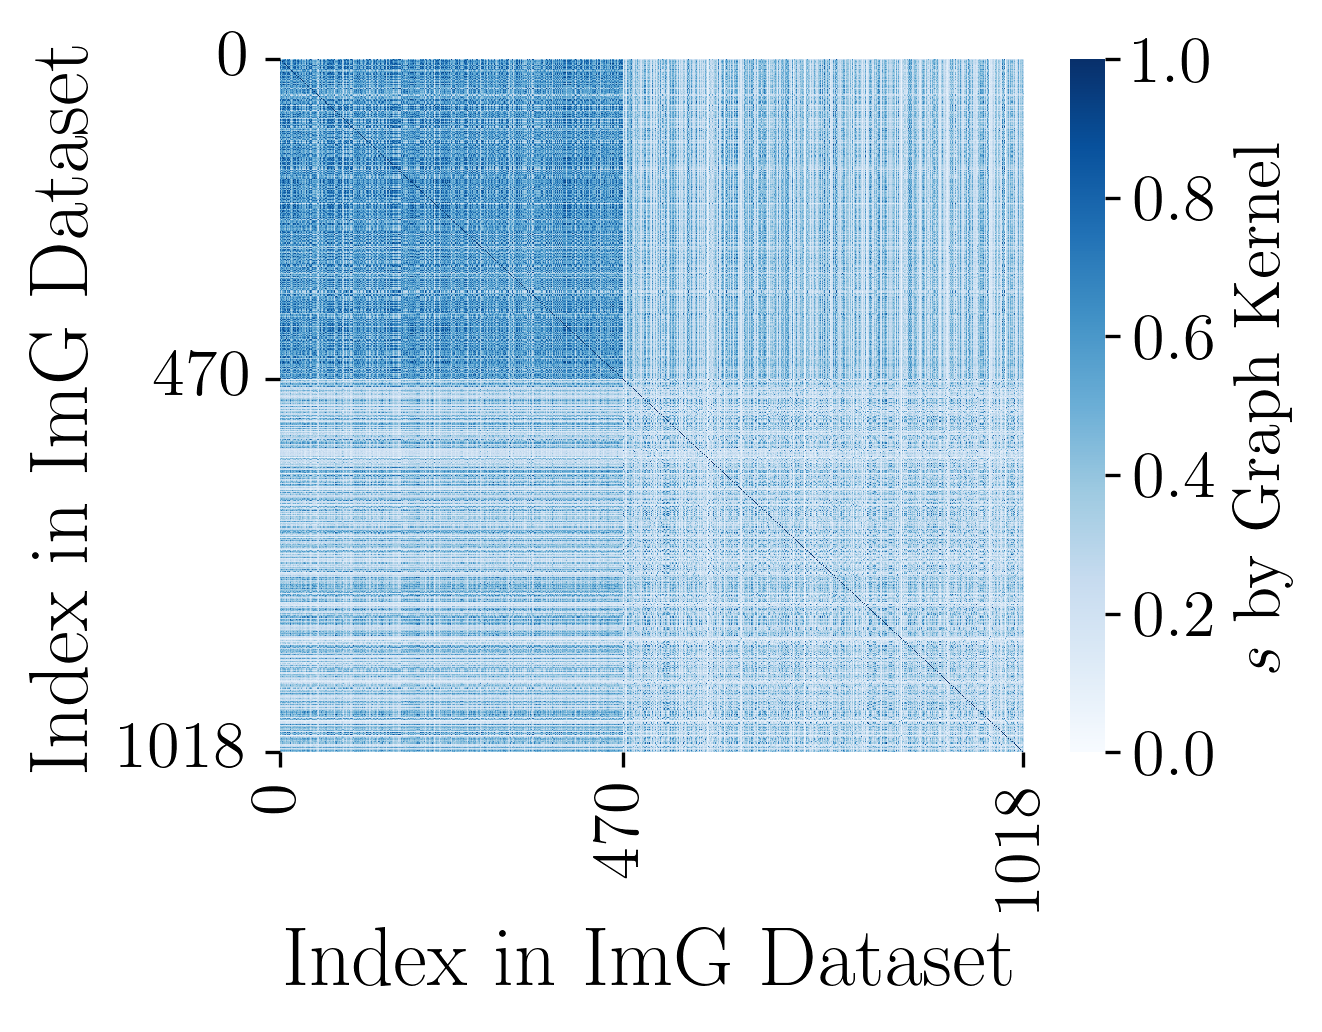

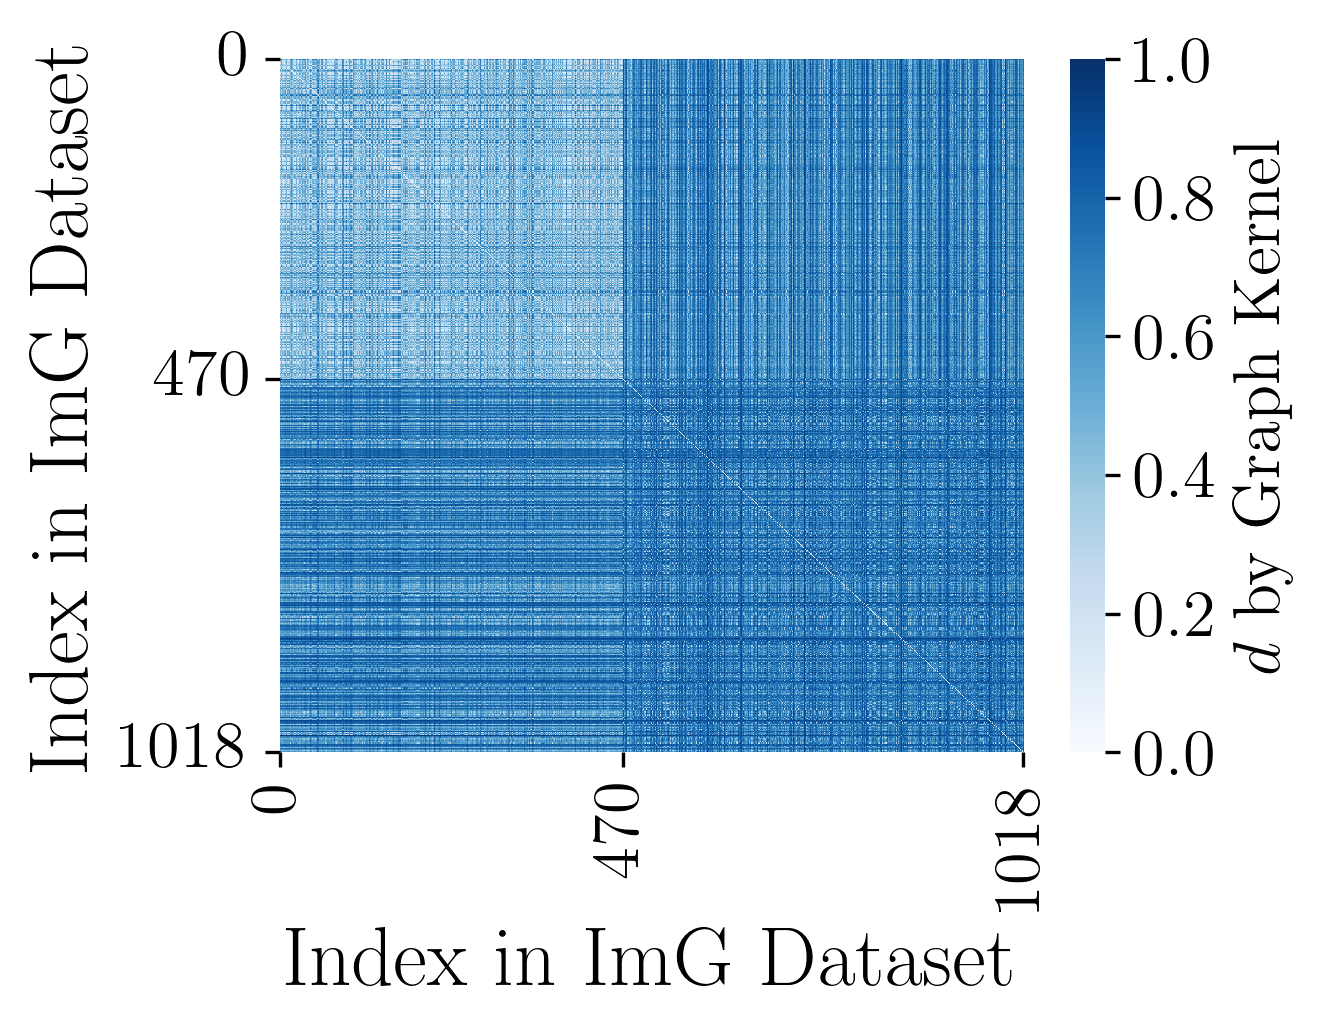

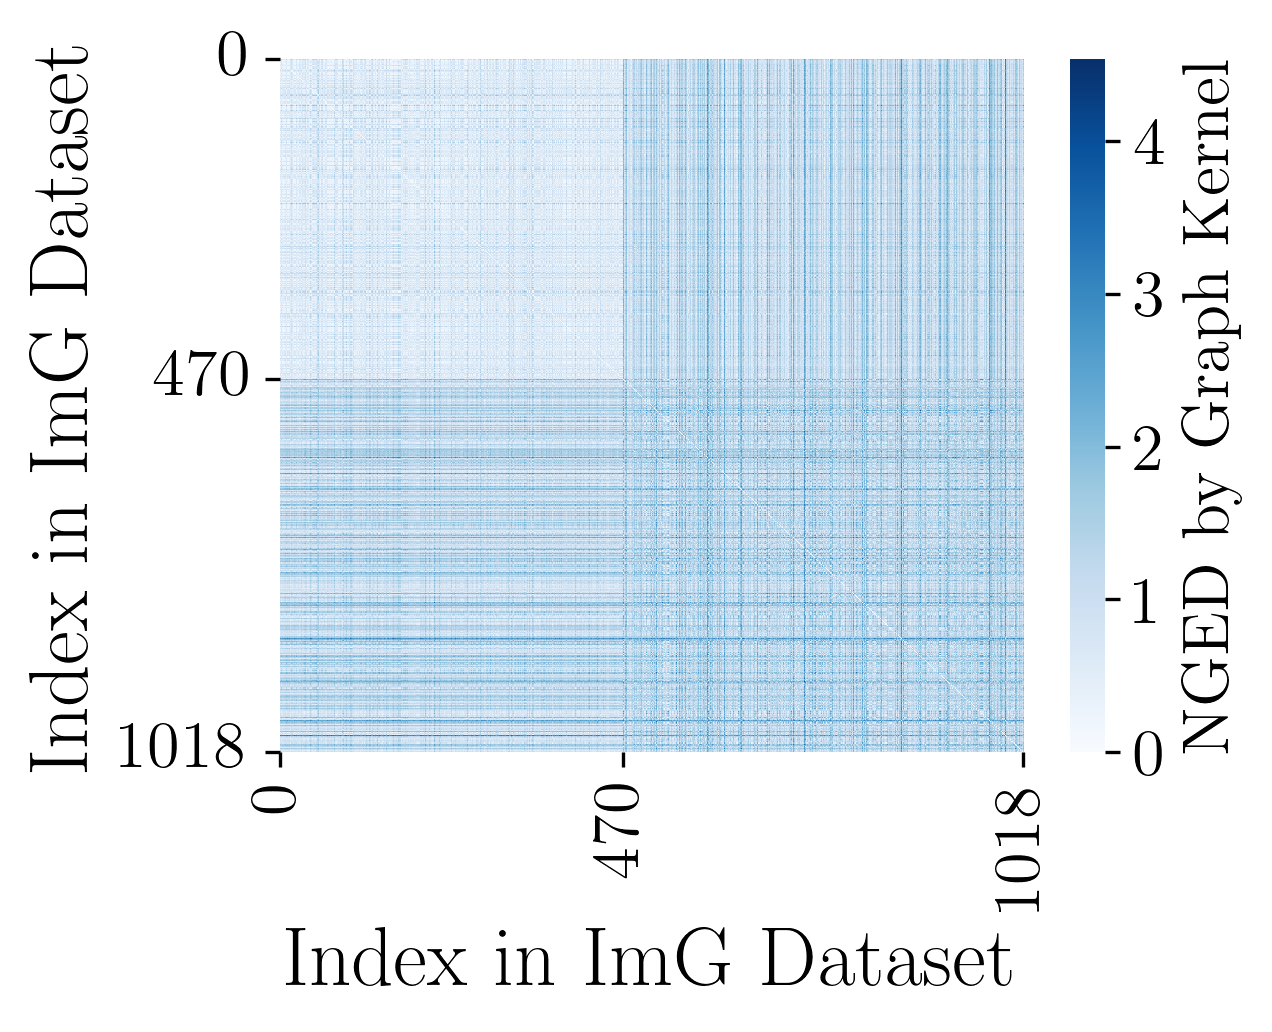

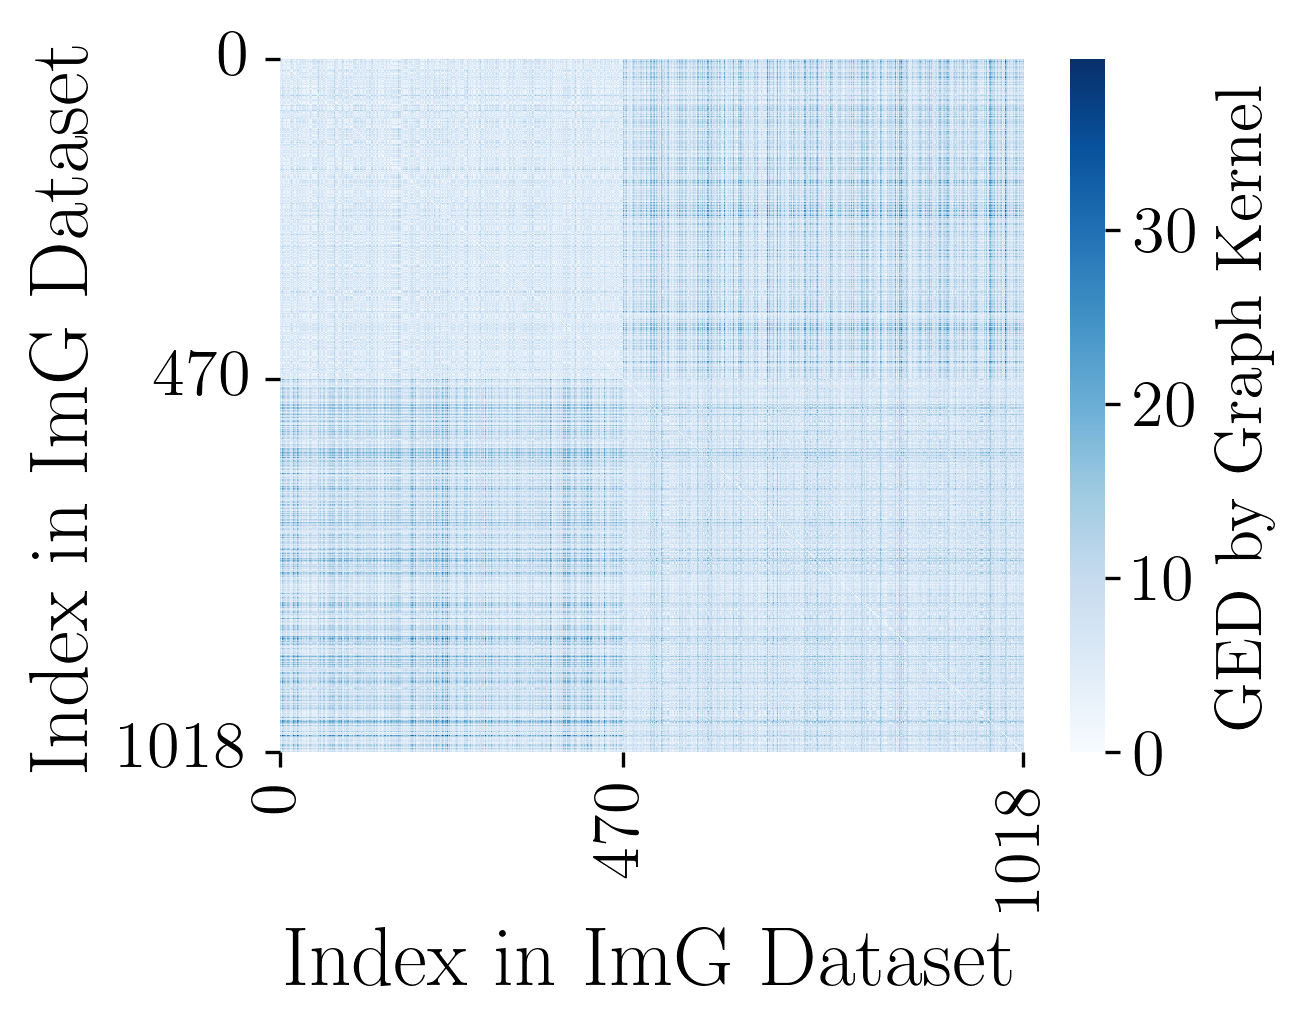

In [10]:
plt.figure(figsize=(4, 3), dpi=300)

sns.heatmap(
    graphkernel_immu_graphs["s_matrix"],
    cmap="Blues",
    vmin=0,
    vmax=1,
    cbar_kws={"label": r"$s$ by Graph Kernel"},
)
# Set custom ticks
plt.xticks([0, 470, 1018], [0, 470, 1018])
plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in ImG Dataset", size=20)
plt.ylabel("Index in ImG Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel(r"$s$ by Graph Kernel", fontsize=16)
plt.show()

plt.figure(figsize=(4, 3), dpi=300)
sns.heatmap(
    graphkernel_immu_graphs["d_matrix"],
    cmap="Blues",
    vmin=0,
    vmax=1,
    cbar_kws={"label": r"$d$ by Graph Kernel"},
)
# Set custom ticks
plt.xticks([0, 470, 1018], [0, 470, 1018])
plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in ImG Dataset", size=20)
plt.ylabel("Index in ImG Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel(r"$d$ by Graph Kernel", fontsize=16)
plt.show()

plt.figure(figsize=(4, 3), dpi=300)
sns.heatmap(
    graphkernel_immu_graphs["nged_matrix"],
    cmap="Blues",
    vmin=0,
    cbar_kws={"label": "NGED by Graph Kernel"},
)
# Set custom ticks
plt.xticks([0, 470, 1018], [0, 470, 1018])
plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in ImG Dataset", size=20)
plt.ylabel("Index in ImG Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel("NGED by Graph Kernel", fontsize=16)
plt.show()


plt.figure(figsize=(4, 3), dpi=300)
sns.heatmap(
    graphkernel_immu_graphs["ged_matrix"],
    cmap="Blues",
    vmin=0,
    cbar_kws={"label": "GED by Graph Kernel"},
)
# Set custom ticks
plt.xticks([0, 470, 1018], [0, 470, 1018])
plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in ImG Dataset", size=20)
plt.ylabel("Index in ImG Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel("GED by Graph Kernel", fontsize=16)
plt.show()

## PCA

### PCA with dissimilarity ($d$) matrix

(array([-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -6.0, '$\\mathdefault{−6}$'),
  Text(0, -5.0, '$\\mathdefault{−5}$'),
  Text(0, -4.0, '$\\mathdefault{−4}$'),
  Text(0, -3.0, '$\\mathdefault{−3}$'),
  Text(0, -2.0, '$\\mathdefault{−2}$'),
  Text(0, -1.0, '$\\mathdefault{−1}$'),
  Text(0, 0.0, '$\\mathdefault{0}$'),
  Text(0, 1.0, '$\\mathdefault{1}$'),
  Text(0, 2.0, '$\\mathdefault{2}$'),
  Text(0, 3.0, '$\\mathdefault{3}$'),
  Text(0, 4.0, '$\\mathdefault{4}$')])

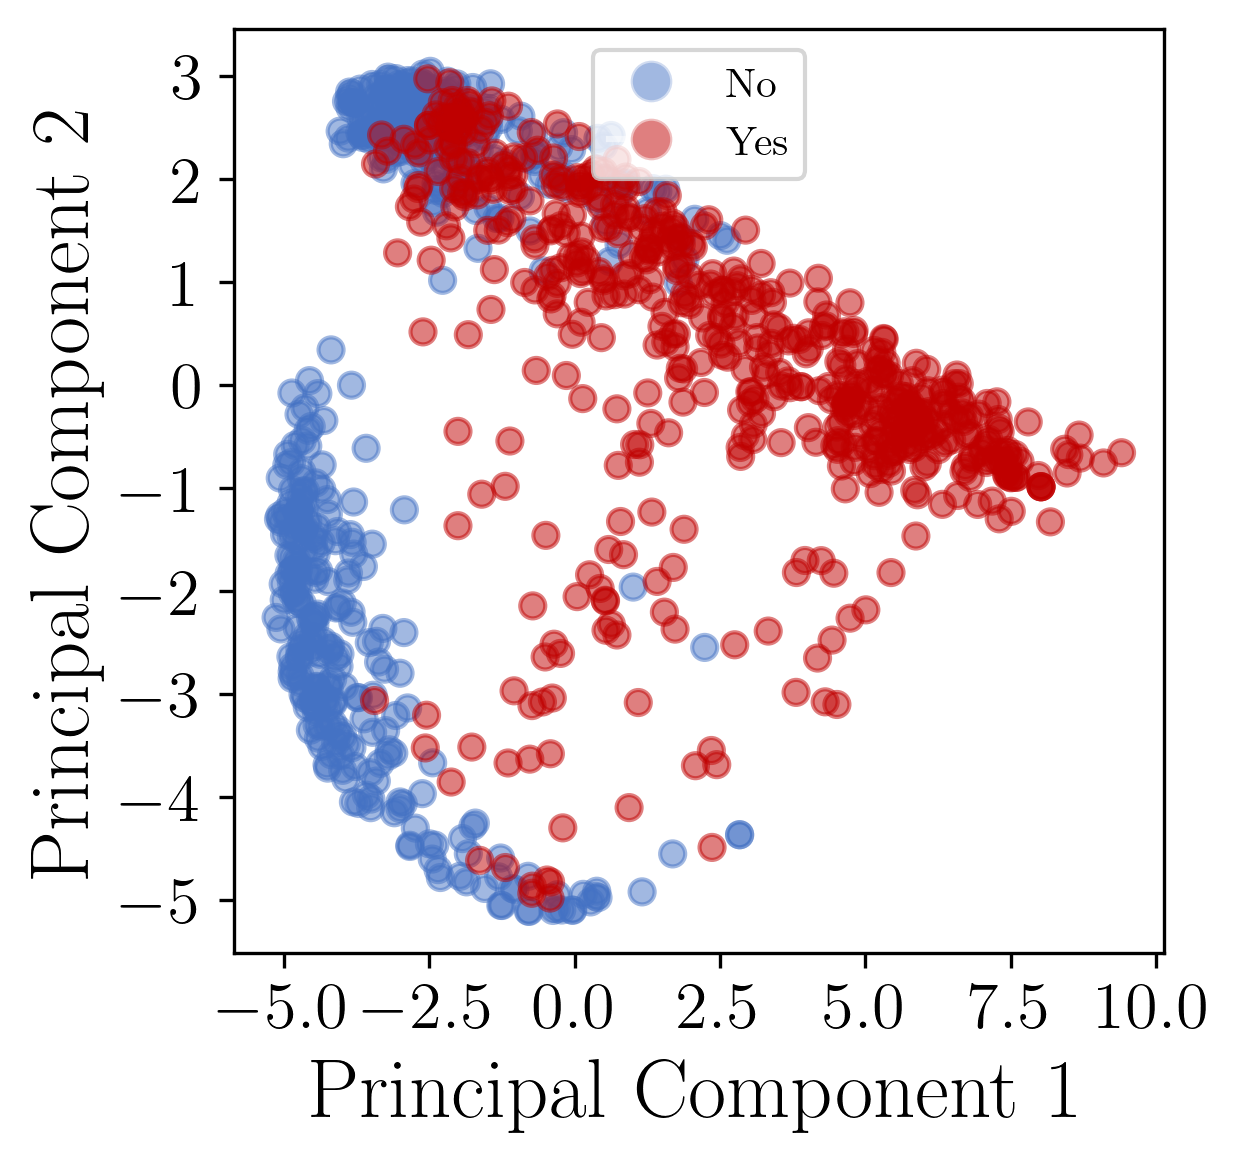

In [11]:
colors = []
labels = []
for i in range(0, len(Immu_Graph_Class)):
    if Immu_Graph_Class[i] == 0:
        colors.append("#4472C4")
        labels.append("No")
    elif Immu_Graph_Class[i] == 1:
        colors.append("#C00000")
        labels.append("Yes")
    else:
        print("error")

n_components = 2
LndS = PCA(n_components=n_components, random_state=42)
LndS.fit(graphkernel_immu_graphs["d_matrix"])
X = LndS.transform(graphkernel_immu_graphs["d_matrix"])
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(X[:, 0], X[:, 1], color=colors, label=labels, alpha=0.5)

legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#4472C4",
        markersize=10,
        alpha=0.5,
        label="No",
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#C00000",
        markersize=10,
        alpha=0.5,
        label="Yes",
    ),
]
plt.legend(handles=legend_elements, loc="upper center")
plt.xlabel("Principal Component 1", size=20)
plt.ylabel("Principal Component 2", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### PCA with NGED matrix

(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.]),
 [Text(0, -15.0, '$\\mathdefault{−15}$'),
  Text(0, -10.0, '$\\mathdefault{−10}$'),
  Text(0, -5.0, '$\\mathdefault{−5}$'),
  Text(0, 0.0, '$\\mathdefault{0}$'),
  Text(0, 5.0, '$\\mathdefault{5}$'),
  Text(0, 10.0, '$\\mathdefault{10}$'),
  Text(0, 15.0, '$\\mathdefault{15}$')])

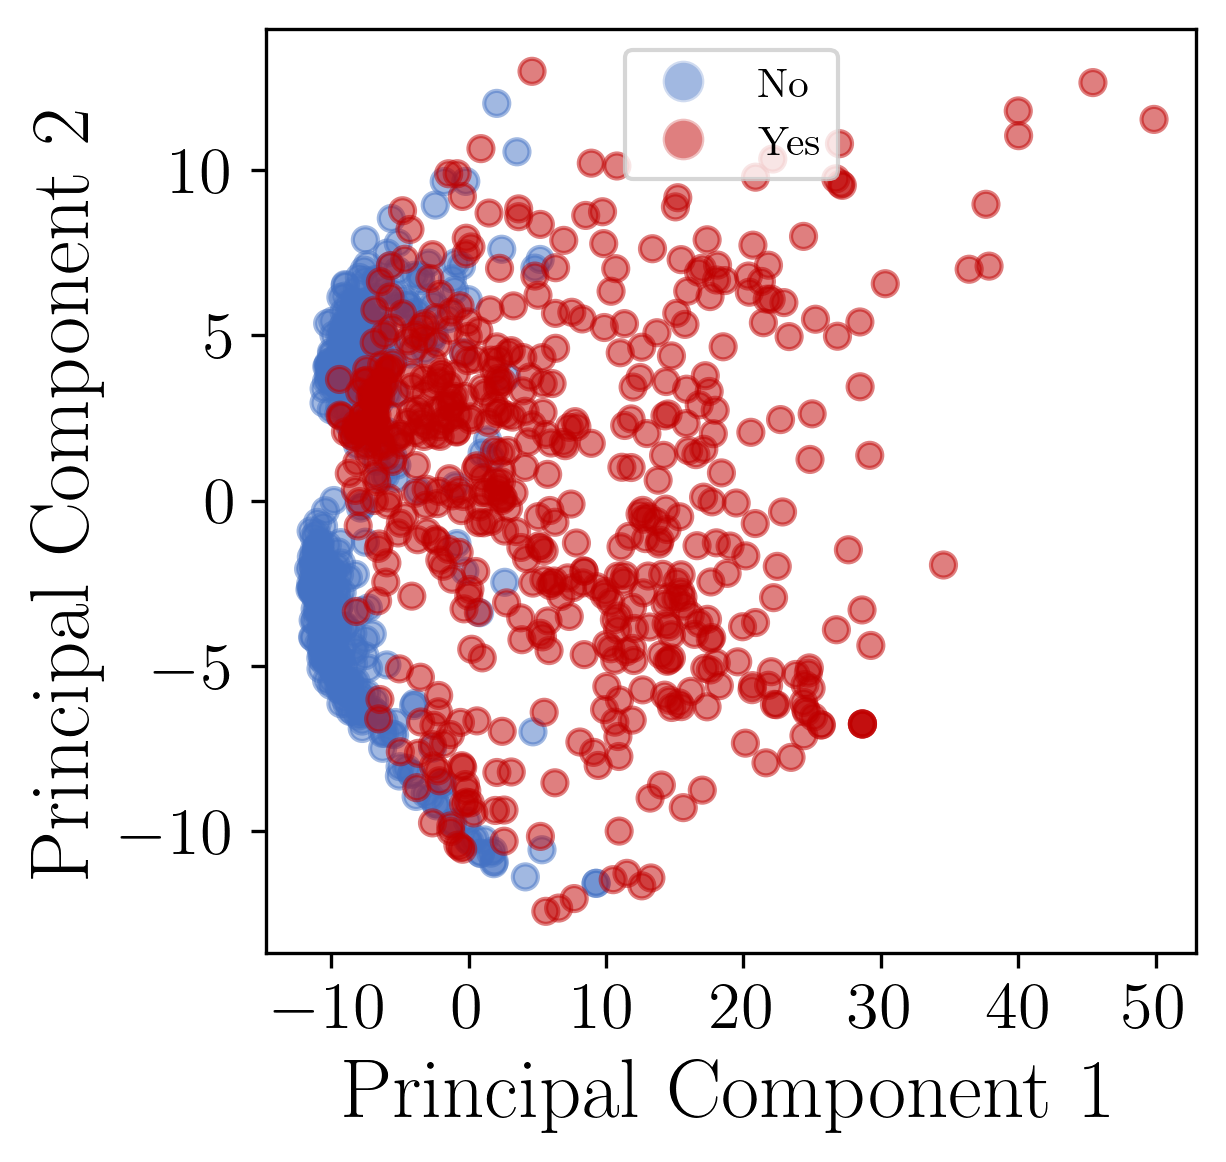

In [12]:
colors = []
labels = []
for i in range(0, len(Immu_Graph_Class)):
    if Immu_Graph_Class[i] == 0:
        colors.append("#4472C4")
        labels.append("No")
    elif Immu_Graph_Class[i] == 1:
        colors.append("#C00000")
        labels.append("Yes")
    else:
        print("error")

n_components = 2
LndS = PCA(n_components=n_components, random_state=42)
LndS.fit(graphkernel_immu_graphs["nged_matrix"])
X = LndS.transform(graphkernel_immu_graphs["nged_matrix"])
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(X[:, 0], X[:, 1], color=colors, label=labels, alpha=0.5)

legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#4472C4",
        markersize=10,
        alpha=0.5,
        label="No",
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#C00000",
        markersize=10,
        alpha=0.5,
        label="Yes",
    ),
]
plt.legend(handles=legend_elements, loc="upper center")
plt.xlabel("Principal Component 1", size=20)
plt.ylabel("Principal Component 2", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### PCA with GED matrix

(array([-150., -100.,  -50.,    0.,   50.,  100.,  150.,  200.,  250.]),
 [Text(0, -150.0, '$\\mathdefault{−150}$'),
  Text(0, -100.0, '$\\mathdefault{−100}$'),
  Text(0, -50.0, '$\\mathdefault{−50}$'),
  Text(0, 0.0, '$\\mathdefault{0}$'),
  Text(0, 50.0, '$\\mathdefault{50}$'),
  Text(0, 100.0, '$\\mathdefault{100}$'),
  Text(0, 150.0, '$\\mathdefault{150}$'),
  Text(0, 200.0, '$\\mathdefault{200}$'),
  Text(0, 250.0, '$\\mathdefault{250}$')])

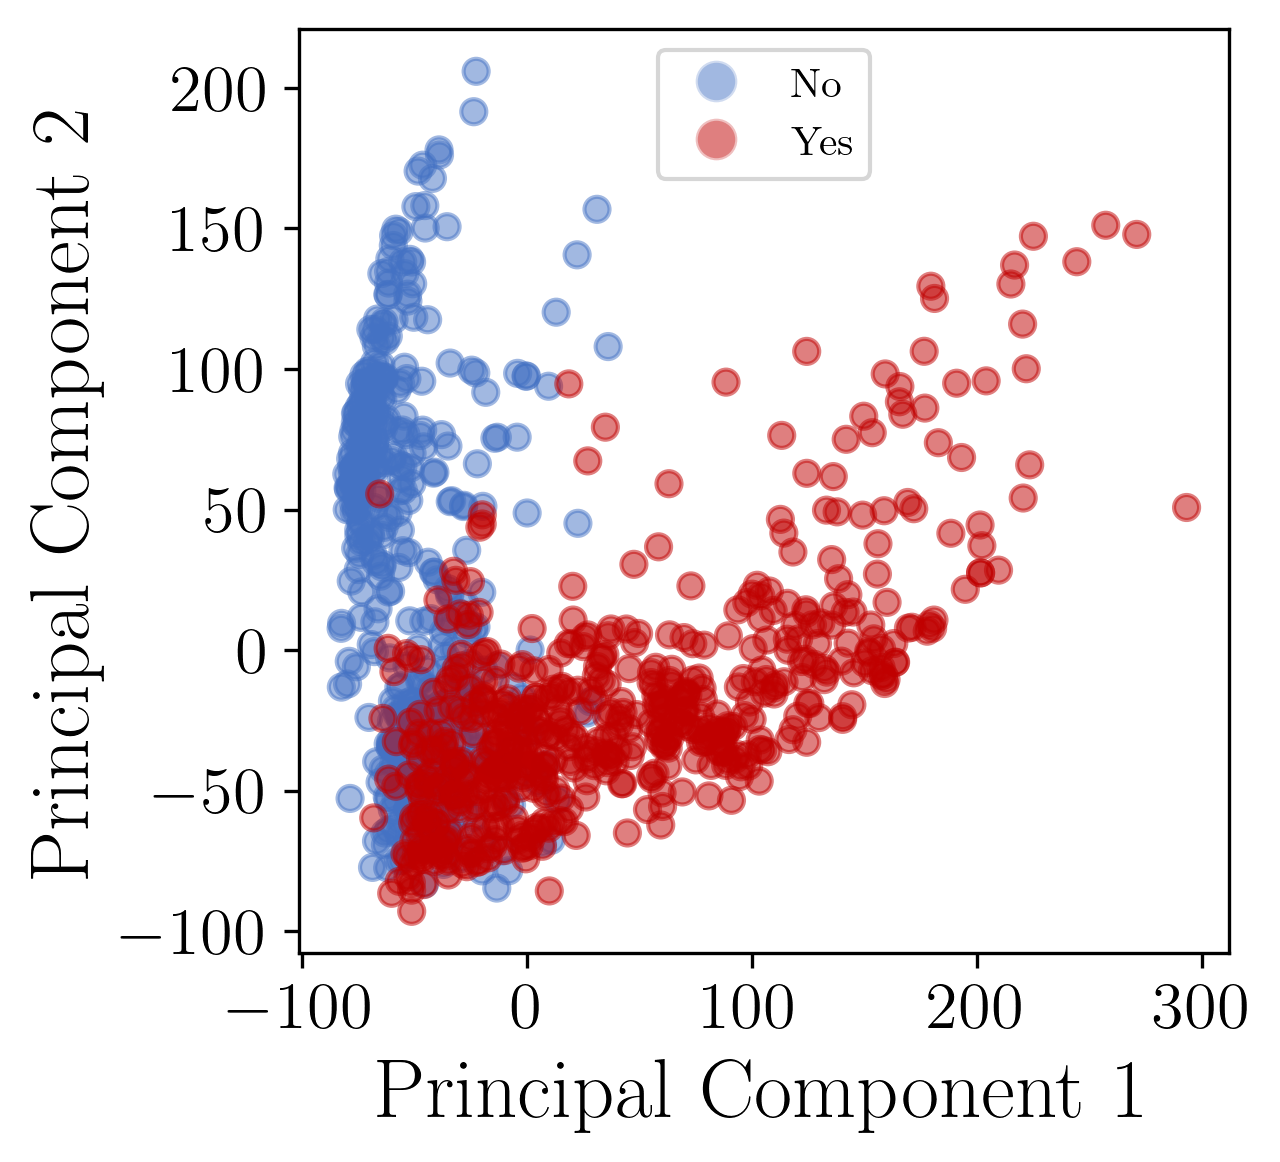

In [13]:
colors = []
labels = []
for i in range(0, len(Immu_Graph_Class)):
    if Immu_Graph_Class[i] == 0:
        colors.append("#4472C4")
        labels.append("No")
    elif Immu_Graph_Class[i] == 1:
        colors.append("#C00000")
        labels.append("Yes")
    else:
        print("error")

n_components = 2
LndS = PCA(n_components=n_components, random_state=42)
LndS.fit(graphkernel_immu_graphs["ged_matrix"])
X = LndS.transform(graphkernel_immu_graphs["ged_matrix"])
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(X[:, 0], X[:, 1], color=colors, label=labels, alpha=0.5)

legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#4472C4",
        markersize=10,
        alpha=0.5,
        label="No",
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="#C00000",
        markersize=10,
        alpha=0.5,
        label="Yes",
    ),
]
plt.legend(handles=legend_elements, loc="upper center")
plt.xlabel("Principal Component 1", size=20)
plt.ylabel("Principal Component 2", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

## Gaussian Process Classification (GPC)

### GPC with dissimilarity (d) matrix

0.9411764705882353
Optimized Kernel: 26.4**2 * RBF(length_scale=4.73)
Optimized Constant Kernel: 699.2387869200091
Optimized RBF Length Scale: 4.731899810961706


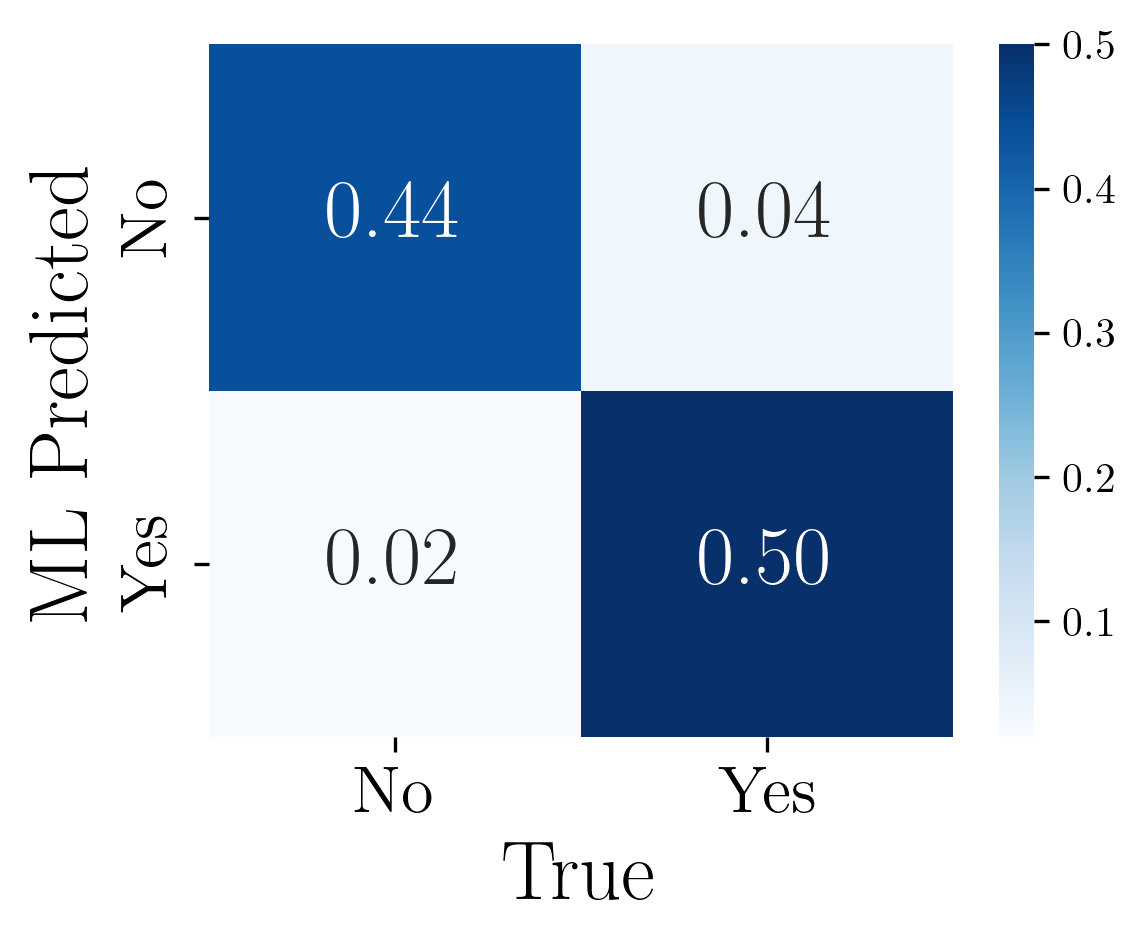

In [14]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=rbf)
gpc.fit(graphkernel_immu_graphs["d_matrix"][train_index, :], Immu_Graph_Class_train)
gpc_score = gpc.score(
    graphkernel_immu_graphs["d_matrix"][test_index, :], Immu_Graph_Class_test
)
print(gpc_score)
optimized_kernel = gpc.kernel_
print("Optimized Kernel:", optimized_kernel)
print("Optimized Constant Kernel:", optimized_kernel.k1.constant_value)
print("Optimized RBF Length Scale:", optimized_kernel.k2.length_scale)

y_train_predict = gpc.predict(graphkernel_immu_graphs["d_matrix"][train_index, :])
y_test_predict = gpc.predict(graphkernel_immu_graphs["d_matrix"][test_index, :])
gpc_cf_matrix_train = confusion_matrix(y_train_predict, Immu_Graph_Class_train)
gpc_cf_matrix_test = confusion_matrix(y_test_predict, Immu_Graph_Class_test)
plt.figure(figsize=(4, 3), dpi=300)
ax = sns.heatmap(
    gpc_cf_matrix_test / gpc_cf_matrix_test.sum(),
    fmt=".2f",
    annot=True,
    cmap="Blues",
    annot_kws={"size": 20},
)  # , categories=categories, ,fmt='.2f%'
ax.set_xticklabels(["No", "Yes"], size=16)
ax.set_yticklabels(["No", "Yes"], size=16)
ax.set_ylabel("ML Predicted", fontsize=20)
ax.set_xlabel("True", fontsize=20)
plt.show()

### GPC with NGED matrix

0.9362745098039216
Optimized Kernel: 46**2 * RBF(length_scale=15.6)
Optimized Constant Kernel: 2119.764908273512
Optimized RBF Length Scale: 15.58536170129838


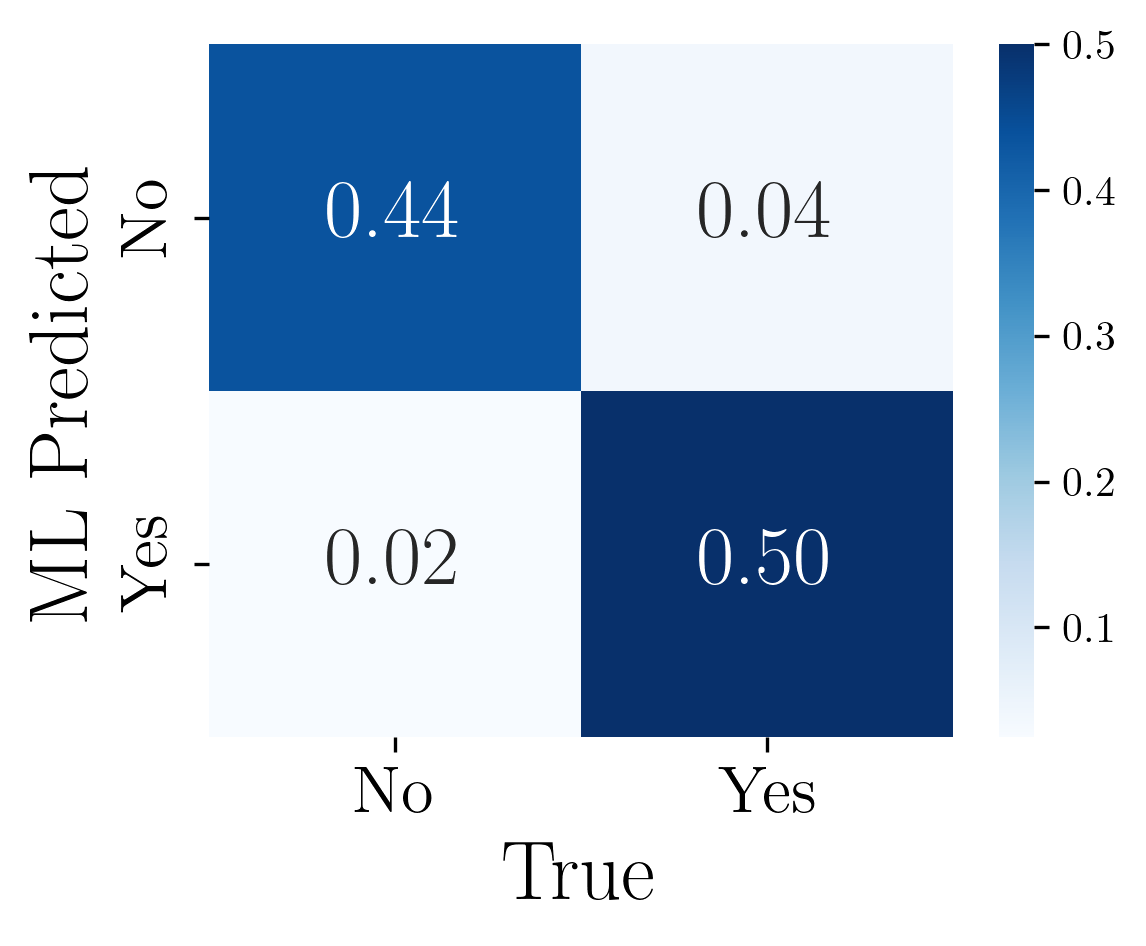

In [15]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=rbf)
gpc.fit(graphkernel_immu_graphs["nged_matrix"][train_index, :], Immu_Graph_Class_train)
gpc_score = gpc.score(
    graphkernel_immu_graphs["nged_matrix"][test_index, :], Immu_Graph_Class_test
)
print(gpc_score)
optimized_kernel = gpc.kernel_
print("Optimized Kernel:", optimized_kernel)
print("Optimized Constant Kernel:", optimized_kernel.k1.constant_value)
print("Optimized RBF Length Scale:", optimized_kernel.k2.length_scale)

y_train_predict = gpc.predict(graphkernel_immu_graphs["nged_matrix"][train_index, :])
y_test_predict = gpc.predict(graphkernel_immu_graphs["nged_matrix"][test_index, :])
gpc_cf_matrix_train = confusion_matrix(y_train_predict, Immu_Graph_Class_train)
gpc_cf_matrix_test = confusion_matrix(y_test_predict, Immu_Graph_Class_test)
plt.figure(figsize=(4, 3), dpi=300)
ax = sns.heatmap(
    gpc_cf_matrix_test / gpc_cf_matrix_test.sum(),
    fmt=".2f",
    annot=True,
    cmap="Blues",
    annot_kws={"size": 20},
)  # , categories=categories, ,fmt='.2f%'
ax.set_xticklabels(["No", "Yes"], size=16)
ax.set_yticklabels(["No", "Yes"], size=16)
ax.set_ylabel("ML Predicted", fontsize=20)
ax.set_xlabel("True", fontsize=20)
plt.show()

### GPC with GED matrix

0.9362745098039216
Optimized Kernel: 53.4**2 * RBF(length_scale=138)
Optimized Constant Kernel: 2851.1391414533837
Optimized RBF Length Scale: 138.15737015286422


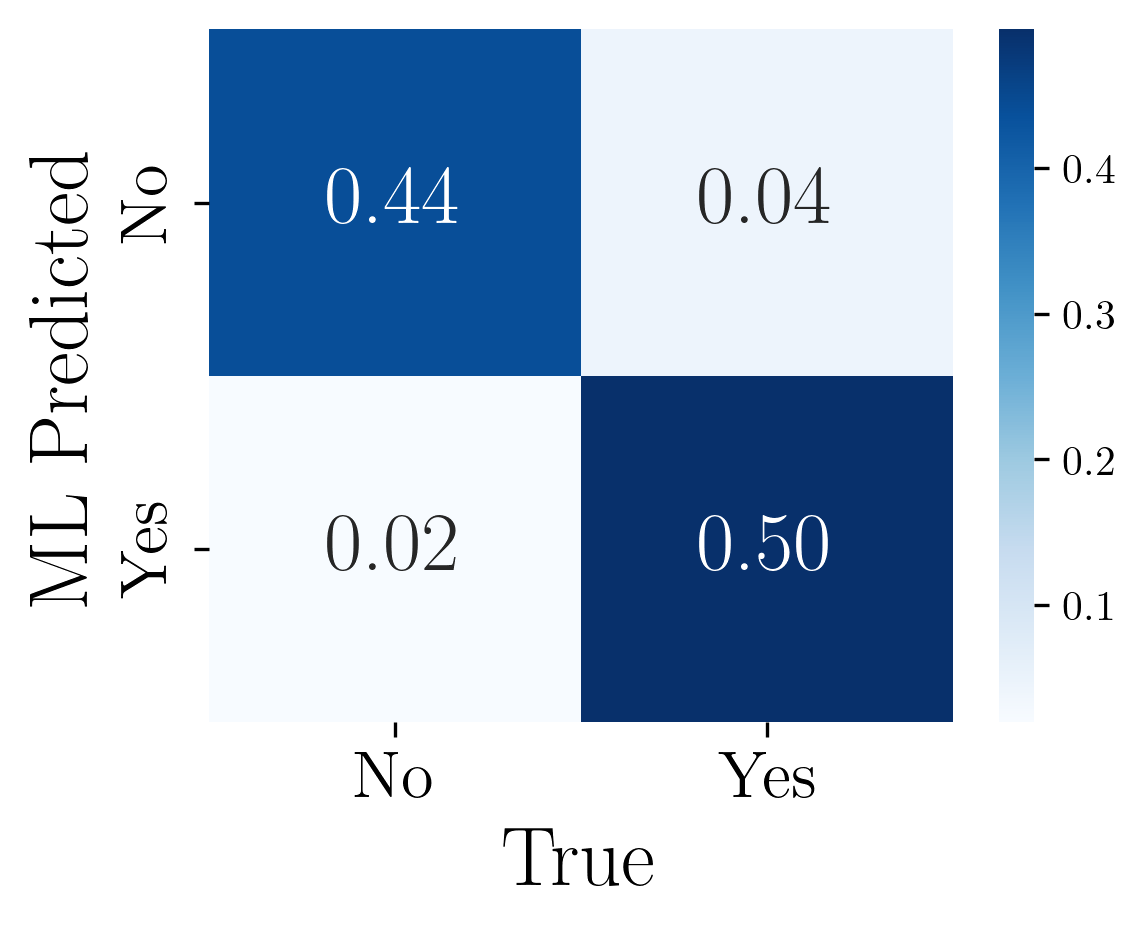

In [16]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=rbf)
gpc.fit(graphkernel_immu_graphs["ged_matrix"][train_index, :], Immu_Graph_Class_train)
gpc_score = gpc.score(
    graphkernel_immu_graphs["ged_matrix"][test_index, :], Immu_Graph_Class_test
)
print(gpc_score)
optimized_kernel = gpc.kernel_
print("Optimized Kernel:", optimized_kernel)
print("Optimized Constant Kernel:", optimized_kernel.k1.constant_value)
print("Optimized RBF Length Scale:", optimized_kernel.k2.length_scale)

y_train_predict = gpc.predict(graphkernel_immu_graphs["ged_matrix"][train_index, :])
y_test_predict = gpc.predict(graphkernel_immu_graphs["ged_matrix"][test_index, :])
gpc_cf_matrix_train = confusion_matrix(y_train_predict, Immu_Graph_Class_train)
gpc_cf_matrix_test = confusion_matrix(y_test_predict, Immu_Graph_Class_test)
plt.figure(figsize=(4, 3), dpi=300)
ax = sns.heatmap(
    gpc_cf_matrix_test / gpc_cf_matrix_test.sum(),
    fmt=".2f",
    annot=True,
    cmap="Blues",
    annot_kws={"size": 20},
)  # , categories=categories, ,fmt='.2f%'
ax.set_xticklabels(["No", "Yes"], size=16)
ax.set_yticklabels(["No", "Yes"], size=16)
ax.set_ylabel("ML Predicted", fontsize=20)
ax.set_xlabel("True", fontsize=20)
plt.show()